# Лабораторная работа №1

### Двумерная модель Изинга

#### Гарифуллин Камиль, Б04-902

Модель Изинга была введена для понимания природы ферромагнетизма и повлияла на изучение фазовых переходов и критических явлений. Ферромагнетизм описывает появление самопроизвольной намагниченности у ферромагнетиков ниже определенной температуры — точки Кюри. В точке Кюри (узкой области температур) происходит упорядочение, в данном случае, выстраивание магнитных моментов, которое влечет фазовый переход, то есть свойства вещества меняются скачком.

 В данной модели, каждая вершина кристаллической решетки принимает число - спин и принимает хначения +1 или -1(«вверх» или «вниз»). Каждому состоянию соответствует энергия, которая получается из попарного взаимодействия спинов соседних атомов:

$$E = -J\sum{s_i s_j}$$

Где J — энергия взаимодействия соседних спинов (константа обменного взаимодействия одна и та же для всех пар).
При этом J > 0 описывает поведение ферромагнетика, J < 0 антиферромагнетика.

Смоделируем систему спинов 10x10 с помощью алгоритма Метрополиса:

1)cформируем начальную конфигурацию.

2)выбирем и опрокинем случайным образом какой-нибудь спин.

3)вычисляем ∆Е, обусловленное произведенным пробным изменением конфигурации.

4)∆Е <=0 => принимаем новую конфигурацию и переходим к шагу 8.

5)∆Е >0 => вычисляем «вероятность перехода»:



$$W = exp(-∆Е/kT)$$

6)генерируем случайное число rnd в интервале (0, 1)

7) rnd≤W => принимаем новую конфигурацию, иначе сохраняем предыдущую конфигурацию.

8) считаем физические величины.

9)повторяем 2–8 для получения достаточного числа конфигураций.

10)вычисляем средние по конфигурациям, которые статистически независимы друг от друга.

In [2]:
import random
import math
import matplotlib
import time

In [3]:

#энергия одного спина
def energy(i, j, chain):
    l = len(chain)
    return -(chain[i-1][j] * chain[i][j] + chain[i][j] * chain[(i+1)%l][j] + chain[i][j-1] * chain[i][j] + chain[i][j] * chain[i][(j+1)%l])/4.0

#разница между пробной энергией и текущей
#def try_energy(i, j, chain):
#    return -8*energy(i, j, chain)
def try_energy(i, j, chain):
    old  = energy(i, j, chain)
    chain[i][j] = -chain[i][j]
    new  = energy(i, j, chain)
    chain[i][j] = -chain[i][j]
    return (new - old)   
def make_chain(N):
    b = []
    for j in range(N):
        a = [-1 if random.randint(0, 1) else 1 for _ in range(N)]
        b.append(a)
    return b 

def calc_tot_en(chain):
    l = len(chain)
    tot_en = 0.0
    for i in range(l):
        for j in range(l):
            tot_en = tot_en + energy(i, j, chain)
    return tot_en


def average_E (chain, T, Niter=100):
    tot_en = calc_tot_en(chain)
    avg_en = 0.0
    N = len(chain)
    for i in range(Niter):
        try_id_i = random.randint(0, N-1)
        try_id_j = random.randint(0, N-1)
        delta_E = 4 * try_energy(try_id_i, try_id_j, chain)
        #print (delta_E)
        if delta_E < 0:
            tot_en += delta_E
            chain[try_id_i][try_id_j] = -chain[try_id_i][try_id_j]
        else:
            if random.uniform(0,1) < math.exp(-(delta_E)/T):
                tot_en += delta_E
                chain[try_id_i][try_id_j] = -chain[try_id_i][try_id_j]
        avg_en += tot_en/Niter
    return avg_en
      

def metropolis(chain, T, etol=0.0001, steps_per_cycle=100):
    avg_en = 0.0
    avg_en_prev = -100*etol
    Ncycles = 0
    energies = []
    steps = 0
    while math.fabs(avg_en-avg_en_prev) > etol:
        #print (avg_en_prev, avg_en)
        avg_en_prev = avg_en
        steps += steps_per_cycle
        avg_en = average_E(chain, T, steps_per_cycle)
        energies.append(avg_en)
        avg_en = (avg_en_prev*Ncycles+avg_en)/(Ncycles+1)
        Ncycles += 1
    return energies

In [4]:
T_list = [0.1 * i for i in range(1,40)]
sim_list=[]
th_list=[]
disp_list=[]

In [5]:
start_time = time.time()
for T in T_list:

    N = 10
  
    chain = make_chain(N)
    energies = metropolis(chain, T, etol = 1e-6)

    disp = 0
    average = sum(energies)/len(energies)
    for i in range(len(energies)):
        disp += (energies[i] - average)**2
    disp = math.sqrt(disp/math.fabs(average))
    disp_list.append(disp)
    print("T: ", T)
    #print("simulation") 
    #print (sum(energies)/len(energies))

    theory = -N * N * math.tanh(1/T)
    #print("theory")
    #print (theory)
    #print("disp")
    #print(disp)
    sim_list.append(sum(energies)/len(energies))
    th_list.append(theory)
print("--- %s seconds ---" % (time.time() - start_time))

T:  0.1
T:  0.2
T:  0.30000000000000004
T:  0.4
T:  0.5
T:  0.6000000000000001
T:  0.7000000000000001
T:  0.8
T:  0.9
T:  1.0
T:  1.1
T:  1.2000000000000002
T:  1.3
T:  1.4000000000000001
T:  1.5
T:  1.6
T:  1.7000000000000002
T:  1.8
T:  1.9000000000000001
T:  2.0
T:  2.1
T:  2.2
T:  2.3000000000000003
T:  2.4000000000000004
T:  2.5
T:  2.6
T:  2.7
T:  2.8000000000000003
T:  2.9000000000000004
T:  3.0
T:  3.1
T:  3.2
T:  3.3000000000000003
T:  3.4000000000000004
T:  3.5
T:  3.6
T:  3.7
T:  3.8000000000000003
T:  3.9000000000000004
--- 546.6591334342957 seconds ---


Получили зависимость средней энергии от температуры в диапазоне от 0 до 4 J/k,
где J – энергия взаимодействия, k – константа Больцмана.

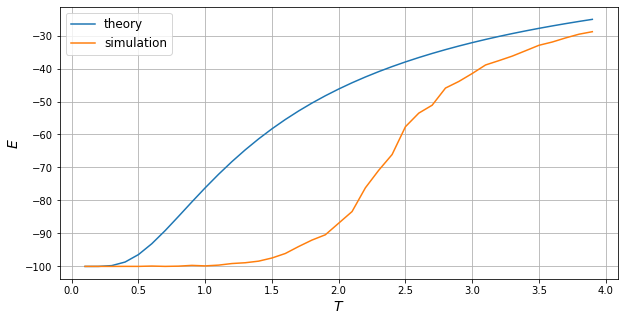

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(T_list, th_list, label=r'theory')
plt.plot(T_list, sim_list, label=r'simulation')
plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$E$', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)

plt.show()

Лист дисперсий:

In [9]:
disp_list

[10.111927434024494,
 11.933536376585794,
 13.335220479808003,
 11.800065005928431,
 9.146561850595726,
 10.17150606144032,
 9.862494387039163,
 14.677735044174332,
 15.29478929057604,
 13.540458409160445,
 13.46268852706076,
 16.105697296916944,
 18.11284694120569,
 17.666494468362544,
 24.928926914790374,
 25.917721218870437,
 28.724527627368605,
 53.70485027375305,
 61.448044314854805,
 61.80045958189419,
 102.59392106074775,
 54.61911883636705,
 114.64455309573775,
 144.0561026482999,
 154.79136173776837,
 96.29525254596388,
 144.58457245981944,
 136.92989103477254,
 58.803761485868314,
 115.8799116220103,
 120.8012091255412,
 56.39927204416115,
 109.54521702327342,
 100.14904065259773,
 131.70598828982722,
 100.84037374930304,
 106.84551720055491,
 109.90338047307148,
 167.84773463031243]

Проверим наличие фазового перехода в 2.27 J/k. Для этого найдем точку перегиба графика(вторая производная). 

In [24]:
print(T_list[20])
print(T_list[30])

2.1
3.1


In [25]:
x = np.array(sim_list)
np.diff(np.diff(x[20:30]))

array([-1.87654908, -0.56489565,  3.67796915, -4.31804778, -1.72390796,
        2.80674637, -3.20225061,  0.40178907])

In [26]:
x = np.array(sim_list)
x_2 = np.diff(np.diff(x))

In [33]:
x_2

array([-1.39018368e-03,  1.54002961e-02, -1.83413744e-02,  1.07251792e-01,
       -2.00133396e-01,  1.71925897e-01,  1.57612944e-01, -3.82216363e-01,
        3.84467144e-01,  2.47081969e-01, -2.37162711e-01,  2.38920202e-01,
        4.75976701e-01,  4.06437683e-01,  7.52991918e-01, -1.57710995e-01,
       -3.58048163e-01,  1.91686619e+00,  4.03040951e-03,  3.67959168e+00,
       -1.87654908e+00, -5.64895647e-01,  3.67796915e+00, -4.31804778e+00,
       -1.72390796e+00,  2.80674637e+00, -3.20225061e+00,  4.01789074e-01,
        1.92199065e-01, -1.28062412e+00,  5.80038537e-02,  2.60806364e-01,
        1.52059490e-02, -6.54038809e-01,  2.52571788e-01, -1.26240126e-01,
       -3.56946974e-01])

In [32]:
print(x_2[22])
print(T_list[22])

3.677969147717839
2.3000000000000003


Таким образом, видно, что при T=2.3 J/k знак второй производной меняется(до 2.3 J/k производная отрицательна, после положительна).

### Добавим магнитное поле

Если поместить модель во внешнее магнитное поле H, то полная энергия примет вид:

$$E = -J\sum{s_i s_j} - H \sum{s_i}$$

Суммарный магнитный момент или намагниченность определяется по следующей формуле:

$$M =  \sum{s_i}$$

Добавим магнитное поле H = 1. При этом магнитная восприимчивость будет равна намагниченности.

In [37]:

#энергия одного спина
def energy(H, i, j, chain):
    l = len(chain)
    return -(chain[i-1][j] * chain[i][j] + chain[i][j] * chain[(i+1)%l][j] + chain[i][j-1] * chain[i][j] + chain[i][j] * chain[i][(j+1)%l])
def energy_H(H, i, j, chain):
    l = len(chain)
    return -H * chain[i][j]

#разница между пробной энергией и текущей
#def try_energy(i, j, chain):
#    return -8*energy(i, j, chain)
def try_energy(H, i, j, chain):
    old  = energy(H, i, j, chain) + energy_H(H, i, j, chain)
    chain[i][j] = -chain[i][j]
    new  = energy(H, i, j, chain) + energy_H(H, i, j, chain)
    chain[i][j] = -chain[i][j]
    return (new - old)   
def make_chain(N):
    b = []
    for j in range(N):
        a = [-1 if random.randint(0, 1) else 1 for _ in range(N)]
        b.append(a)
    return b 

def calc_tot_en(H, chain):
    l = len(chain)
    tot_en = 0.0
    
    for i in range(l):
        for j in range(l):
            tot_en = tot_en + energy(H, i, j, chain)/4.0 + energy_H(H, i, j, chain)
            
            
    return tot_en


def average_E (H, chain, T, Niter=100):
    tot_en = calc_tot_en(H, chain)
    avg_en = 0.0
    N = len(chain)
    for i in range(Niter):
        try_id_i = random.randint(0, N-1)
        try_id_j = random.randint(0, N-1)
        delta_E = try_energy(H, try_id_i, try_id_j, chain)
        #print (delta_E)
        if delta_E < 0:
            tot_en += delta_E
            chain[try_id_i][try_id_j] = -chain[try_id_i][try_id_j]
        else:
            if random.uniform(0,1) < math.exp(-(delta_E)/T):
                tot_en += delta_E
                chain[try_id_i][try_id_j] = -chain[try_id_i][try_id_j]
        avg_en += tot_en/Niter
    return avg_en
      

def metropolis(H, chain, T, etol=0.0001, steps_per_cycle=100):
    avg_en = 0.0
    avg_en_prev = -100*etol
    Ncycles = 0
    energies = []
    M_list = []
    steps = 0
    while math.fabs(avg_en - avg_en_prev) > etol:#сходимость
        #print (avg_en_prev, avg_en)
        avg_en_prev = avg_en
        steps += steps_per_cycle
        avg_en = average_E(H, chain, T, steps_per_cycle)
        M = 0
        l = len(chain)
        for i in range(l):
            for j in range(l):
                M = M + chain[i][j]
        energies.append(avg_en)
        M_list.append(M)
        avg_en = (avg_en_prev*Ncycles+avg_en)/(Ncycles+1)
        Ncycles += 1
    return energies, M_list

In [53]:
T_list = [0.3 * i for i in range(1,80)]
sim_list=[]
M_l=[]
for T in T_list:
    N = 10

    H = 1
    chain = make_chain(N)
    energies, M_list = metropolis(H, chain, T, etol = 1e-6)
    l = len(chain)

    average = sum(energies)/len(energies)
    average2 = sum(M_list)/len(M_list)
    sim_list.append(sum(energies)/len(energies))
    M_l.append(average2)
    print(T) 
    print (sum(energies)/len(energies))
    print(average2)
    l = len(chain)
    K = 0
    for i in range(l):
        for j in range(l):
            K = K + chain[i][j]
    print(K)
  

0.3
-199.9818451200705
99.99217889402952
100
0.6
-199.9859187730758
99.99488781596138
100
0.8999999999999999
-199.97631887852046
99.9912173288857
100
1.2
-199.79523462270134
99.93214965123653
100
1.5
-199.18818025680844
99.72029115891061
98
1.7999999999999998
-197.3911764286222
99.10580009987872
100
2.1
-193.33915452930728
97.67033747779752
98
2.4
-187.839937007874
95.61889763779527
96
2.6999999999999997
-179.94030467163245
92.58970886932973
92
3.0
-169.91930020057924
88.6382883886784
94
3.3
-157.43818359375
83.34765625
72
3.5999999999999996
-143.05572715039824
77.09036331642687
78
3.9
-128.4597830714646
70.34161175874303
74
4.2
-115.12274978153243
63.86775415088844
64
4.5
-102.75581153922954
57.70892393691356
50
4.8
-92.37781565373382
52.305449652388425
46
5.1
-81.1804347826088
46.160370634354955
54
5.3999999999999995
-74.68336516598444
42.60027285129604
30
5.7
-66.31936813186809
38.04120879120879
48
6.0
-59.89848515864884
34.344933469805525
40
6.3
-56.4203171726325
32.45491617580426


Построим зависимость намагниченности от температуры.  

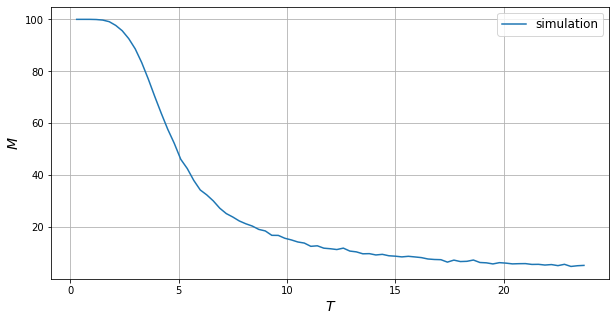

In [55]:
plt.figure(figsize=(10, 5))
T_2=np.array(T_list)
plt.plot(T_list, np.array(M_l), label=r'simulation')

plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$M$', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.savefig('figure_with_legend.png')
plt.show()

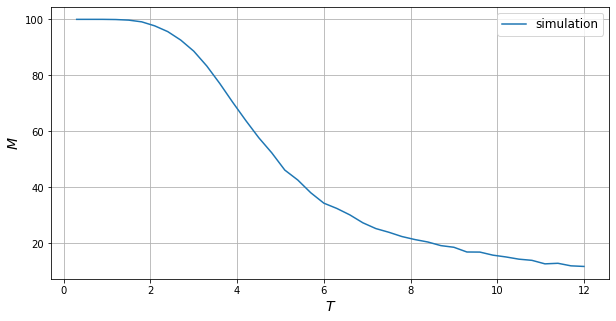

In [56]:
plt.figure(figsize=(10, 5))
T_2=np.array(T_list)
plt.plot(T_list[:40], np.array(M_l[:40]), label=r'simulation')

plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$M$', fontsize=14)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.savefig('figure_with_legend.png')
plt.show()

# Вывод

Таким образом мы смоделировали систему спинов 10x10 с помощью алгоритма Метрополиса. Получили зависимость средней энергии от температуры в диапазоне от 0 до 4 J/k, где J – энергия взаимодействия, k – константа Больцмана и проверили наличие фазового перехода(2.3 - 2.5 J/k). Построена зависимость намагниченности от температуры.